In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tqdm
%matplotlib inline

In [33]:
df_S=pd.read_csv("raw/SeebeckCoefficient.csv",index_col=0)

In [34]:
df_s=pd.read_csv("raw/ElectricalConductivity.csv",index_col=0)

In [35]:
df_k=pd.read_csv("raw/ThermalConductivity.csv",index_col=0)

In [36]:
df_zt_fit=pd.read_csv("fit/ZT.csv",index_col=0)

In [37]:
ztlist_fit=df_zt_fit.max()

In [38]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['axes.grid']=True
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

451it [00:01, 344.98it/s]
451it [00:01, 405.94it/s]
451it [00:01, 413.80it/s]
/home/m-kumagai/.pyenv/versions/anaconda3-4.3.1/envs/py3.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


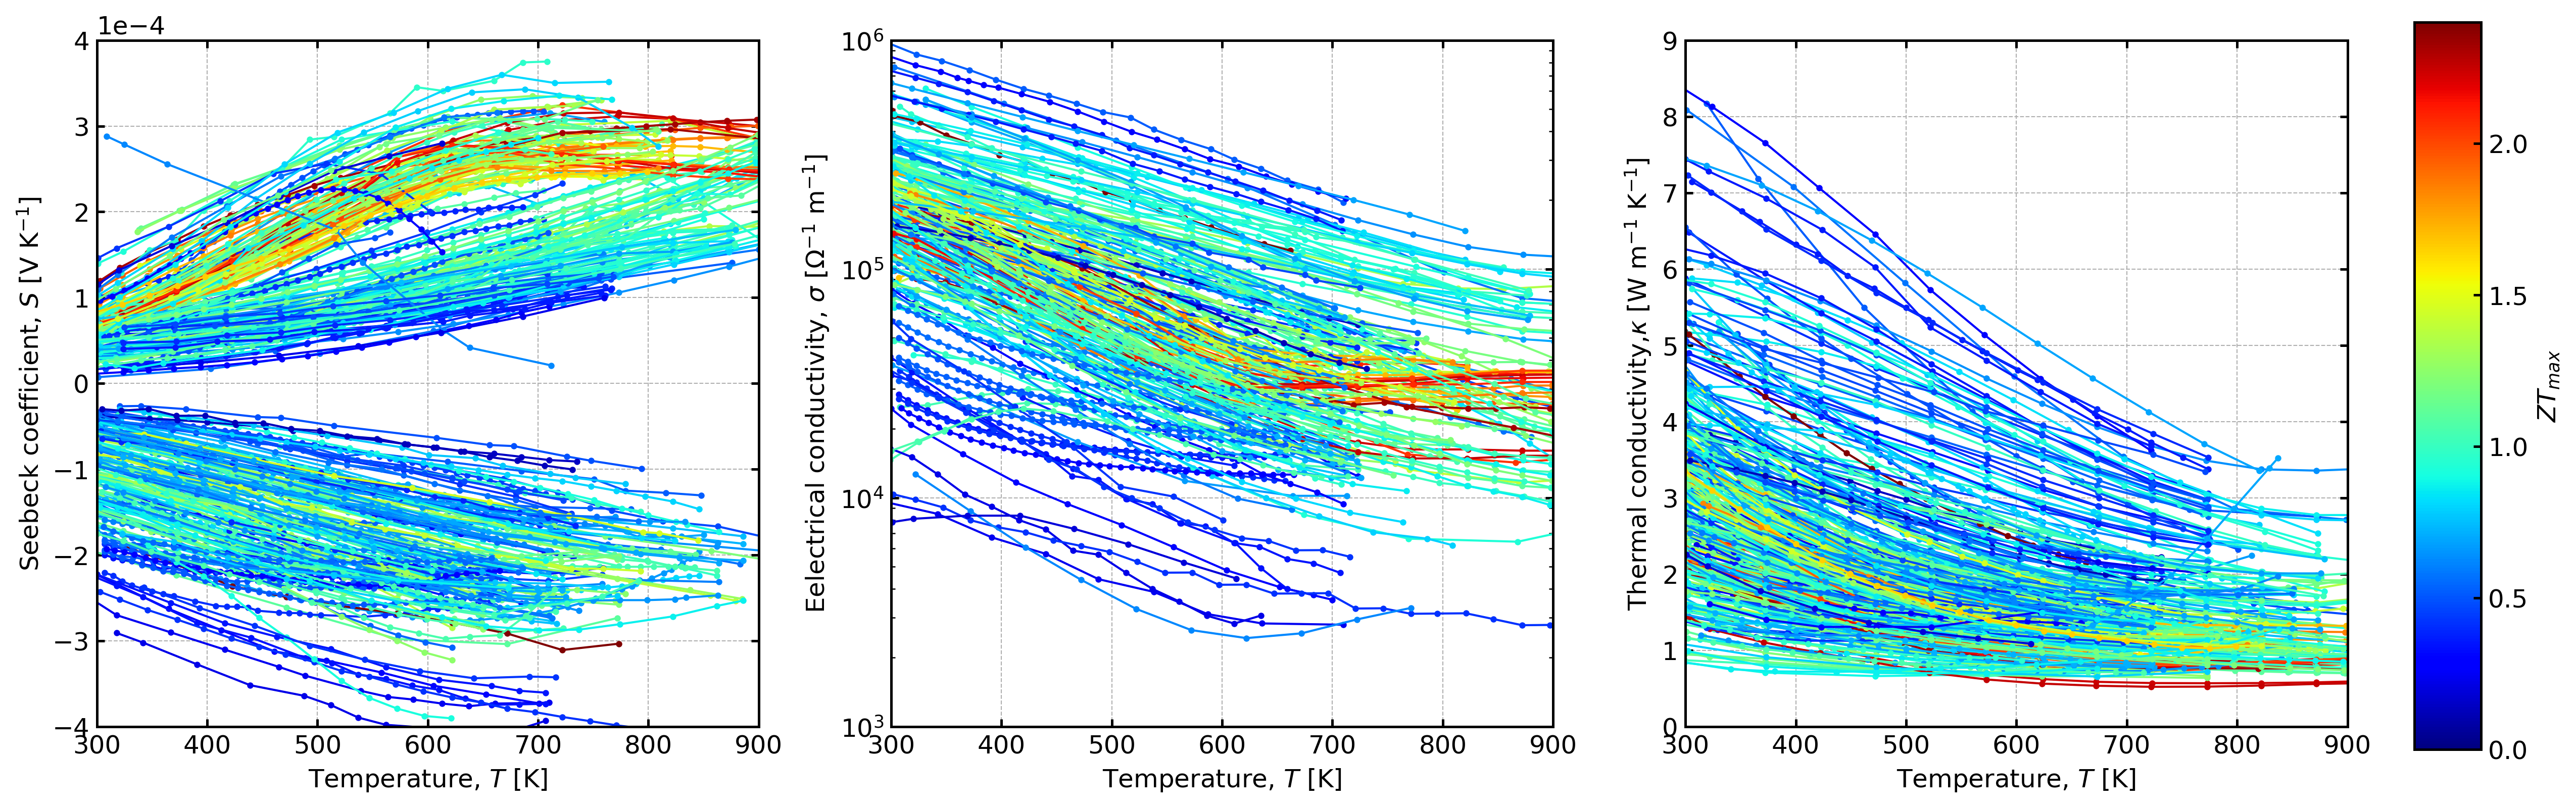

In [39]:
lw=1
ms=2

colormap = matplotlib.cm.jet #coolwarm #jet
normalize = matplotlib.colors.Normalize(vmin=0, vmax=2.4)
s_map = matplotlib.cm.ScalarMappable(cmap=colormap, norm=normalize)
s_map.set_array([])

fig = plt.figure(figsize=(22,6),dpi=300,facecolor='w',edgecolor='k')
fig.subplots_adjust(right=0.8)

ax = fig.add_subplot(1,3,1)
ax.ticklabel_format(style="sci", scilimits=(0,0), axis="y")
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel("Temperature, $\it{T}$ [K]")
ax.set_ylabel("Seebeck coefficient, $\it{S}$ [V K$^{-1}$]")
ax.set_xlim(300,900)
ax.set_ylim(-0.0004,0.0004)
for i, S in tqdm.tqdm((df_S).iteritems()):
    color = colormap(normalize(ztlist_fit[i]))
    if not(np.isnan(ztlist_fit[i])):
        ax.plot(S.dropna().index,S.dropna(), c=color, marker='o', linestyle='-',linewidth=lw, markersize=ms)

ax2 = fig.add_subplot(1,3,2)
ax2.ticklabel_format(style="sci", scilimits=(0,0), axis="y")
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xlabel("Temperature, $\it{T}$ [K]")
ax2.set_ylabel("Eelectrical conductivity, $\it{\sigma}$ [$\Omega$$^{-1}$ m$^{-1}$]")
ax2.set_xlim(300,900)
ax2.set_ylim(1000,1000000)
ax2.set_yscale('log')
for i, s in tqdm.tqdm((df_s).iteritems()):
    color = colormap(normalize(ztlist_fit[i]))
    if not(np.isnan(ztlist_fit[i])):
        ax2.plot(s.dropna().index,s.dropna(), c=color, marker='o', linestyle='-',linewidth=lw, markersize=ms)

ax3 = fig.add_subplot(1,3,3)
ax3.ticklabel_format(style="sci", scilimits=(0,0), axis="y")
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xlabel("Temperature, $\it{T}$ [K]")
ax3.set_ylabel("Thermal conductivity,$\it{\kappa}$ [W m$^{-1}$ K$^{-1}$]")
ax3.set_xlim(300,900)
ax3.set_ylim(0,9)
for i, k in tqdm.tqdm((df_k).iteritems()):
    color = colormap(normalize(ztlist_fit[i]))
    if not(np.isnan(ztlist_fit[i])):
        ax3.plot(k.dropna().index,k.dropna(), c=color, marker='o', linestyle='-',linewidth=lw, markersize=ms)
#fig.colorbar(s_map).set_label(label="$\it{ZT}_{max}$")    

cb_ax = fig.add_axes([0.82, 0.1, 0.02, 0.8])
cbar = fig.colorbar(s_map, cax=cb_ax).set_label(label="$\it{ZT}_{max}$")